In [21]:
import glob
from netCDF4 import Dataset
from dateutil.parser import parse
import datetime
import numpy as np
import matplotlib.dates as mdates
import pytz
from datetime import datetime as dt
from matplotlib import pyplot as plt

In [22]:
the_file='cabauw_ubc.nc'
group='m201412'
with Dataset(the_file,'r') as nc_ubc:
    july_nc=nc_ubc.groups[group]
    z=nc_ubc.variables['z'][...]
    july_speed=july_nc.variables['F'][...]
    july_ta002 = july_nc.variables['TA002']


In [23]:
hourly_wind_avg=july_speed.mean(axis=2)

In [24]:
hourly_wind_avg.shape

(31, 24, 7)

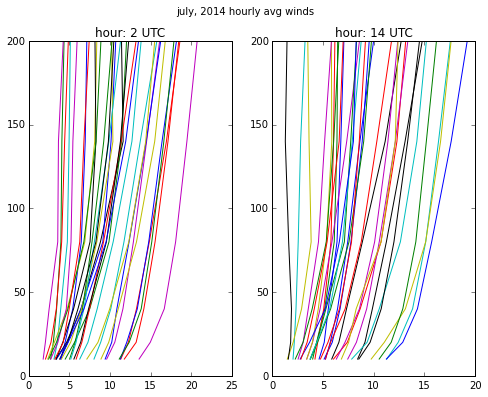

In [25]:
%matplotlib inline
the_month='july, 2014'
hour=2
fig,ax=plt.subplots(1,2,figsize=(8,6))
ax[0].plot(hourly_wind_avg[:,hour,:].T,z)
ax[0].set(title='hour: {} UTC'.format(hour))
hour=14
ax[1].plot(hourly_wind_avg[:,hour,:].T,z)
ax[1].set(title='hour: {} UTC'.format(hour))
fig.suptitle('{} hourly avg winds'.format(the_month))

```
S=a0 + a1*z + a2*z**2 + a3*np.log(z)
direc=b0 + b1*z + b2*z**2
theta=c0 + c1*z + c2*z**2. + c3*np.log(z)
```

NameError: name 'func' is not defined

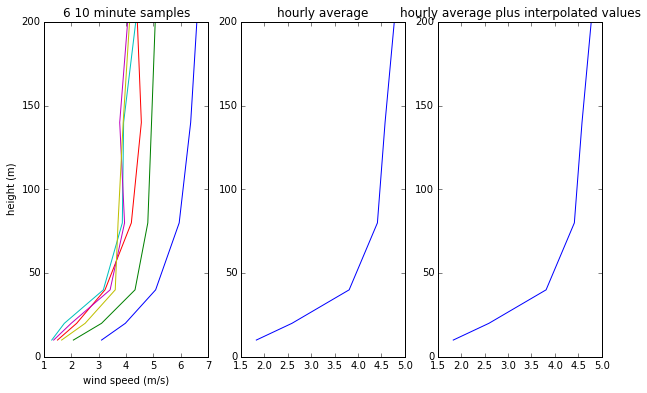

In [26]:

#http://kitchingroup.cheme.cmu.edu/blog/2013/02/12/Nonlinear-curve-fitting-with-parameter-confidence-intervals/
import numpy as np
from scipy.optimize import curve_fit
import scipy
from scipy.stats.distributions import  t
import warnings
warnings.filterwarnings("ignore",category=scipy.optimize.OptimizeWarning)

hour=5
day=25
fig,ax=plt.subplots(1,3,figsize=(10,6))
sample=july_speed[day,hour,:,:]
ax[0].plot(sample.T,z)
ax[0].set(title='6 10 minute samples',xlabel='wind speed (m/s)',
         ylabel='height (m)')
ax[1].plot(hourly_wind_avg[day,hour,:],z)
ax[1].set(title='hourly average')
ax[2].plot(hourly_wind_avg[day,hour,:],z)
ax[2].set(title='hourly average plus interpolated values')
#
# flip tower data so it goes from bottom to top
# and get rid of the lowest level, which doesn't
# have a measurement
#
rev_z=z[::-1]
rev_z=rev_z[1:]
test=hourly_wind_avg[day,hour,::-1]
test=test[1:]

def wind_func(z, *coeffs):
    'nonlinear function in a and to fit to data'
    fit = coeffs[0] + coeffs[1]*z + coeffs[2]*z**2. + coeffs[3]*np.log(z)
    return fit

initial_guess=[0,0,0,0]
pars, pcov = curve_fit(wind_func, rev_z, test, p0=initial_guess)
initial_guess
pars
zinterp=np.linspace(10.,200,50.)
speed_interp=wind_func(zinterp,*pars)
ax[2].plot(speed_interp,zinterp,'ro',alpha=0.5)
pars

In [ ]:
with Dataset(the_file,'r') as nc_ubc:
    july_nc=nc_ubc.groups[group]
    H=july_nc.variables['H'][...]
    LE = july_nc.variables['LE'][...]
    USTAR = july_nc.variables['UST'][...]
    TA002 = july_nc.variables['TA002'][...]
    Q002 = july_nc.variables['Q002'][...]
    P0 = july_nc.variables['P0'][...]
    timevec = july_nc.variables['time'][...]
    timevec = [dt.fromtimestamp(item,pytz.utc) \
               for item in timevec.flat]
    
Rd=287.  #J/kg/K
cp = 1004.  #J/kg/K
k = 0.4
g=9.8
rho = P0*1.e2/(Rd*(TA002 + 273.15))

In [ ]:
#fleagle and bussinger eq. 6.31
Eb = H + 0.02*LE
#virtural temperature 
Tv = TA002 + 273.15  + 0.61*Q002*1.e-3
#Fleagle and Businger 6.47
L = - Tv*cp*rho*USTAR**3./(k*g*Eb)
good = np.abs(Eb) > 1
Tv.shape
Tv[0,0,0]
rho[0,0,0]
USTAR[0,0,0]
L[0,0,0]
Eb[0,0,0]
275*1004*1.2*0.3**3/(0.4*9.8*60)

In [ ]:
fig,ax=plt.subplots(1,1)
out=plt.hist(L[good].flat,bins=np.linspace(-150,150,40))

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
fig.autofmt_xdate()
ax.plot(timevec,L.flat)
title='Obukhov length L {}'.format(the_month)
out=ax.set(title=title,ylabel='L $(m)$',ylim=[-150,150])

In [ ]:
!pwd